In [1]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [3]:
# Author: Lars Buitinck
# License: BSD 3 clause

from __future__ import print_function
from collections import defaultdict
import re
import sys
from time import time

import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import DictVectorizer, FeatureHasher


def n_nonzero_columns(X):
    """Returns the number of non-zero columns in a CSR matrix X."""
    return len(np.unique(X.nonzero()[1]))


def tokens(doc):
    """Extract tokens from doc.

    This uses a simple regex to break strings into tokens. For a more
    principled approach, see CountVectorizer or TfidfVectorizer.
    """
    return (tok.lower() for tok in re.findall(r"\w+", doc))


def token_freqs(doc):
    """Extract a dict mapping tokens from doc to their frequencies."""
    freq = defaultdict(int)
    for tok in tokens(doc):
        freq[tok] += 1
    return freq


categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.sys.ibm.pc.hardware',
    'misc.forsale',
    'rec.autos',
    'sci.space',
    'talk.religion.misc',
]
# Uncomment the following line to use a larger set (11k+ documents)
#categories = None

print(__doc__)
print("Usage: %s [n_features_for_hashing]" % sys.argv[0])
print("    The default number of features is 2**18.")
print()

n_features = 2 ** 18
print('n features: %s'%n_features)

print("Loading 20 newsgroups training data")
raw_data = fetch_20newsgroups(subset='train', categories=categories).data
data_size_mb = sum(len(s.encode('utf-8')) for s in raw_data) / 1e6
print("%d documents - %0.3fMB" % (len(raw_data), data_size_mb))
print()

print("DictVectorizer")
t0 = time()
vectorizer = DictVectorizer()
vectorizer.fit_transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_size_mb / duration))
print("Found %d unique terms" % len(vectorizer.get_feature_names()))
print()

print("FeatureHasher on frequency dicts")
t0 = time()
hasher = FeatureHasher(n_features=n_features)
X = hasher.transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_size_mb / duration))
print("Found %d unique terms" % n_nonzero_columns(X))
print()

print("FeatureHasher on raw tokens")
t0 = time()
hasher = FeatureHasher(n_features=n_features, input_type="string")
X = hasher.transform(tokens(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_size_mb / duration))
print("Found %d unique terms" % n_nonzero_columns(X))

Automatically created module for IPython interactive environment
Usage: /home/ubuntu/.local/share/virtualenvs/DRIVENDATA_SUBMISSIONS/lib/python3.5/site-packages/ipykernel_launcher.py [n_features_for_hashing]
    The default number of features is 2**18.

n features: 262144
Loading 20 newsgroups training data
3803 documents - 6.245MB

DictVectorizer
done in 1.344018s at 4.646MB/s
Found 47928 unique terms

FeatureHasher on frequency dicts
done in 0.921371s at 6.778MB/s
Found 43873 unique terms

FeatureHasher on raw tokens
done in 0.845424s at 7.387MB/s
Found 43873 unique terms


In [6]:
raw_data[0]

'Subject: Re: Christian Daemons? [Biblical Demons, the u\nFrom: stigaard@mhd.moorhead.msus.edu\nReply-To: stigaard@mhd.moorhead.msus.edu\nOrganization: Moorhead State University, Moorhead, MN\nNntp-Posting-Host: 134.29.97.2\nLines: 23\n\n>>>667\n>>>the neighbor of the beast\n>>\n>>No, 667 is across the street from the beast.  664 and 668 are the\n>>neighbors of the beast.\n>\n>I think some people are still not clear on this:\n>667 is *not* the neighbor of the beast, but, rather, across the\n>street. It is, in fact, 668 which is the neighbor of the beast.\n\nno, sheesh, didn\'t you know 666 is the beast\'s apartment?  667 is across the\nhall from the beast, and is his neighbor along with the rest of the 6th floor.\n\n>Justin (still trying to figure out what this has to do with alt.discordia)\n\nThis doesn\'t seem discordant to you?\n\n-----------------------     ----------------------     -----------------------\n\t-Paul W. Stigaard, Lokean Discordian Libertarian\n  !XOA!\t\tinternet:  

In [7]:
raw_data[1]

"From: matmcinn@nuscc.nus.sg (Matthew MacIntyre at the National University of Senegal)\nSubject: Re: WARNING.....(please read)...\nOrganization: National University of Singapore\nX-Newsreader: Tin 1.1 PL4\nLines: 9\n\ncallison@uokmax.ecn.uoknor.edu (James P. Callison) writes:\n: >> \n: >I'm not going to argue the issue of carrying weapons, but I would ask you if \n: >you would have thought seriously about shooting a kid for setting off your\n: >alarm?  I can think of worse things in the world.  Glad you got out of there\n: >before they did anything to give you a reason to fire your gun.\n: \nI think people have a right to kill to defend their property. Why not? Be\nhonest: do you really care more about scum than about your  car?\n"

In [22]:
y = token_freqs(raw_data[0])
len(y.items())

110

In [14]:
X = hasher.transform(token_freqs(raw_data[0]))
X.shape

(110, 262144)

In [32]:
y['daemons'], y['demons'], list(y.keys()).index('daemons'), list(y.keys()).index('demons')

(1, 1, 104, 80)

In [49]:
# (X[104,:] != X[80,:]).sum()
import scipy
scipy.sparse.linalg.norm(X[104,:] - X[104,:]), scipy.sparse.linalg.norm(X[104,:] - X[80,:]), scipy.sparse.linalg.norm(X[104,:] - X[0,:])

(0.0, 1.0, 2.449489742783178)

In [36]:
(X[104,:] != X[81,:]).sum()

7

In [59]:
X = hasher.transform(['some words', 'some/words', 'disaster recovery'])
scipy.sparse.linalg.norm(X[0,:]), scipy.sparse.linalg.norm(X[1,:]), scipy.sparse.linalg.norm(X[0,:] - X[1,:]), scipy.sparse.linalg.norm(X[0,:] - X[2,:]), 

(3.7416573867739413, 3.7416573867739413, 1.4142135623730951, 4.123105625617661)

In [66]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
# X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X)  


print(svd.explained_variance_ratio_)  

print(svd.explained_variance_ratio_.sum())  

print(svd.singular_values_)  

[0.18533332 0.73818206]
0.9235153782662598
[6.94278062 3.1351222 ]


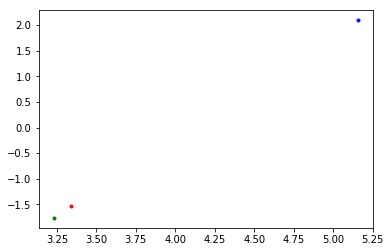

In [73]:
from matplotlib import pyplot as plt

Y = svd.transform(X)
plt.plot(Y[0,0], Y[0,1], 'r.')
plt.plot(Y[1,0], Y[1,1], 'g.')
plt.plot(Y[2,0], Y[2,1], 'b.')
plt.show()

In [ ]:
# https://keras.io/preprocessing/text/
from keras.preprocessing.text import *

In [79]:
hashing_trick("some words some/words some-more words", 15)

[9, 4, 9, 4, 9, 6, 4]

In [92]:
tt=Tokenizer()
x_in = ['some words', 'some/words', 'function hashing']
tt.fit_on_texts(x_in)
[".".join([str(y) for y in x]) for x in tt.texts_to_sequences(x_in)]
# tt.sequences_to_matrix(tt.texts_to_sequences(x_in))

['1.2', '1.2', '3.4']